In [5]:
# Что такое Wikipedia API? 
# Ответ:
# Движок MediaWiki имеет свой API, который является веб-службой, обеспечивающей
# доступ к таким функциям вики, как аутентификация, операции над страницами, поиск по вики и множество других операций.

In [6]:
# Мы так просто не сможем отправить запрос на Wikipedia.
# Для этого нужен специальный адресс API Wikipedia: "https://en.wikipedia.org/w/api.php"

In [7]:
# Можете использовать alternative: import wikipedia  //wrapper for wiki API, Но тут запрещается использовать это.
# → Using pip install wikipedia and import wikipedia is strictly forbidden!

In [8]:
### 1) Первый шаг Import requests и взять от этого сайта дату в виде json

In [9]:
pip install seaborn


     |████████████████████████████████| 292 kB 10.0 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [45]:
import requests
import re
import seaborn as sns
url = "https://en.wikipedia.org/w/api.php"
res = requests.get(url, params = {"action":"query", "prop":"extracts", "titles":"Ozone_layer", "format":"json"})
json_data = res.json()
print(json_data)

{'batchcomplete': '', 'warnings': {'extracts': {'*': 'HTML may be malformed and/or unbalanced and may omit inline images. Use at your own risk. Known problems are listed at https://www.mediawiki.org/wiki/Special:MyLanguage/Extension:TextExtracts#Caveats.'}}, 'query': {'normalized': [{'from': 'Ozone_layer', 'to': 'Ozone layer'}], 'pages': {'22834': {'pageid': 22834, 'ns': 0, 'title': 'Ozone layer', 'extract': '<p class="mw-empty-elt">\n</p>\n\n<p>The <b>ozone layer</b> or <b>ozone shield</b> is a region of Earth\'s stratosphere that absorbs most of the Sun\'s ultraviolet  radiation. It contains a high concentration of ozone (O<sub>3</sub>) in relation to other parts of the atmosphere, although still small in relation to other gases in the stratosphere. The ozone layer contains less than 10 parts per million of ozone, while the average ozone concentration in Earth\'s atmosphere as a whole is about 0.3 parts per million. The ozone layer is mainly found in the lower portion of the stratosp

In [43]:
raw_text = json_data['query']['pages']['22834']['extract']
print(raw_text)


<p class="mw-empty-elt">
</p>

<p>The <b>ozone layer</b> or <b>ozone shield</b> is a region of Earth's stratosphere that absorbs most of the Sun's ultraviolet  radiation. It contains a high concentration of ozone (O<sub>3</sub>) in relation to other parts of the atmosphere, although still small in relation to other gases in the stratosphere. The ozone layer contains less than 10 parts per million of ozone, while the average ozone concentration in Earth's atmosphere as a whole is about 0.3 parts per million. The ozone layer is mainly found in the lower portion of the stratosphere, from approximately 15 to 35 kilometers (9 to 22 mi) above Earth, although its thickness varies seasonally and geographically.</p><p>The ozone layer was discovered in 1913 by the French physicists Charles Fabry and Henri Buisson. Measurements of the sun showed that the radiation sent out from its surface and reaching the ground on Earth is usually consistent with the spectrum of a black body with a temperature 

In [12]:
# 2) 2 Шаг  CLEAN HTML 
# Для этого мы используес import re - module for regular expressions


In [13]:
def cleanhtml(raw_html):
  html = re.compile('<.*?>')
  clean = re.sub(html,'', raw_html)  
  return clean

In [14]:
no_html_text = cleanhtml(raw_text)

In [46]:
print(no_html_text)




The ozone layer or ozone shield is a region of Earth's stratosphere that absorbs most of the Sun's ultraviolet  radiation. It contains a high concentration of ozone (O3) in relation to other parts of the atmosphere, although still small in relation to other gases in the stratosphere. The ozone layer contains less than 10 parts per million of ozone, while the average ozone concentration in Earth's atmosphere as a whole is about 0.3 parts per million. The ozone layer is mainly found in the lower portion of the stratosphere, from approximately 15 to 35 kilometers (9 to 22 mi) above Earth, although its thickness varies seasonally and geographically.The ozone layer was discovered in 1913 by the French physicists Charles Fabry and Henri Buisson. Measurements of the sun showed that the radiation sent out from its surface and reaching the ground on Earth is usually consistent with the spectrum of a black body with a temperature in the range of 5,500–6,000 K (5,230–5,730 °C), except that the

In [16]:
### 3) 3 Шаг Split list 


In [17]:
def merge_contents(data):
    splitted_text = re.split("\. |, |\.|\n| |-|\'", data)
    return splitted_text
merge_content = merge_contents(no_html_text)

In [47]:
print(merge_content)

['', '', '', 'The', 'ozone', 'layer', 'or', 'ozone', 'shield', 'is', 'a', 'region', 'of', 'Earth', 's', 'stratosphere', 'that', 'absorbs', 'most', 'of', 'the', 'Sun', 's', 'ultraviolet', '', 'radiation', 'It', 'contains', 'a', 'high', 'concentration', 'of', 'ozone', '(O3)', 'in', 'relation', 'to', 'other', 'parts', 'of', 'the', 'atmosphere', 'although', 'still', 'small', 'in', 'relation', 'to', 'other', 'gases', 'in', 'the', 'stratosphere', 'The', 'ozone', 'layer', 'contains', 'less', 'than', '10', 'parts', 'per', 'million', 'of', 'ozone', 'while', 'the', 'average', 'ozone', 'concentration', 'in', 'Earth', 's', 'atmosphere', 'as', 'a', 'whole', 'is', 'about', '0', '3', 'parts', 'per', 'million', 'The', 'ozone', 'layer', 'is', 'mainly', 'found', 'in', 'the', 'lower', 'portion', 'of', 'the', 'stratosphere', 'from', 'approximately', '15', 'to', '35', 'kilometers', '(9', 'to', '22\xa0mi)', 'above', 'Earth', 'although', 'its', 'thickness', 'varies', 'seasonally', 'and', 'geographically', 'T

In [19]:
# 4) 4 Шаг глубокая очистка листа Deep cleaning


In [20]:
def tokenize(content):
    special_char_removed = [word for word in content if word.isalnum()] #!@#$%^^&, list comprehension - Это цикл или loop только в ону линию
    
    num_removed = [word for word in special_char_removed if not word.isdigit()]

    return num_removed
    
collection = tokenize(merge_content)

In [48]:
print(collection)

['The', 'ozone', 'layer', 'or', 'ozone', 'shield', 'is', 'a', 'region', 'of', 'Earth', 's', 'stratosphere', 'that', 'absorbs', 'most', 'of', 'the', 'Sun', 's', 'ultraviolet', 'radiation', 'It', 'contains', 'a', 'high', 'concentration', 'of', 'ozone', 'in', 'relation', 'to', 'other', 'parts', 'of', 'the', 'atmosphere', 'although', 'still', 'small', 'in', 'relation', 'to', 'other', 'gases', 'in', 'the', 'stratosphere', 'The', 'ozone', 'layer', 'contains', 'less', 'than', 'parts', 'per', 'million', 'of', 'ozone', 'while', 'the', 'average', 'ozone', 'concentration', 'in', 'Earth', 's', 'atmosphere', 'as', 'a', 'whole', 'is', 'about', 'parts', 'per', 'million', 'The', 'ozone', 'layer', 'is', 'mainly', 'found', 'in', 'the', 'lower', 'portion', 'of', 'the', 'stratosphere', 'from', 'approximately', 'to', 'kilometers', 'to', 'above', 'Earth', 'although', 'its', 'thickness', 'varies', 'seasonally', 'and', 'geographically', 'The', 'ozone', 'layer', 'was', 'discovered', 'in', 'by', 'the', 'French'

In [22]:
# I can used lop 
# my_list = []
# for word in merge_content:
#     if word.isalnum():
#         my_list.append(word)

# my_list

In [23]:
# 5) 5  Шаг lower_collection - Зделать все буквы маленькими



In [24]:
def lower_collection(collection):
    
    lower_each = [word.lower() for word in collection]
    return lower_each
plain_text = lower_collection(collection)

In [49]:
print(plain_text)

['the', 'ozone', 'layer', 'or', 'ozone', 'shield', 'is', 'a', 'region', 'of', 'earth', 's', 'stratosphere', 'that', 'absorbs', 'most', 'of', 'the', 'sun', 's', 'ultraviolet', 'radiation', 'it', 'contains', 'a', 'high', 'concentration', 'of', 'ozone', 'in', 'relation', 'to', 'other', 'parts', 'of', 'the', 'atmosphere', 'although', 'still', 'small', 'in', 'relation', 'to', 'other', 'gases', 'in', 'the', 'stratosphere', 'the', 'ozone', 'layer', 'contains', 'less', 'than', 'parts', 'per', 'million', 'of', 'ozone', 'while', 'the', 'average', 'ozone', 'concentration', 'in', 'earth', 's', 'atmosphere', 'as', 'a', 'whole', 'is', 'about', 'parts', 'per', 'million', 'the', 'ozone', 'layer', 'is', 'mainly', 'found', 'in', 'the', 'lower', 'portion', 'of', 'the', 'stratosphere', 'from', 'approximately', 'to', 'kilometers', 'to', 'above', 'earth', 'although', 'its', 'thickness', 'varies', 'seasonally', 'and', 'geographically', 'the', 'ozone', 'layer', 'was', 'discovered', 'in', 'by', 'the', 'french'

In [26]:
# 6) 6 Шаг Term Frequency - часто повторяемые слова мы должны найти 



In [27]:
def count_frequency(collection):
    frequency = {} 
    for word in collection:
        if word in frequency:
            frequency[word] += 1
        else:
            frequency[word] = 1
    return frequency
freq_of_words = count_frequency(plain_text)


In [50]:
print(freq_of_words)

{'the': 214, 'of': 108, 'ozone': 94, 'and': 84, 'in': 72, 'to': 68, 'is': 39, 'a': 35, 'layer': 27, 'by': 25, 's': 24, 'that': 21, 'was': 18, 'for': 17, 'are': 17, 'radiation': 16, 'uv': 16, 'be': 15, 'about': 14, 'from': 14, 'at': 14, 'ultraviolet': 13, 'as': 13, 'earth': 12, 'stratosphere': 12, 'atmosphere': 12, 'with': 12, 'depletion': 12, 'it': 11, 'o': 11, 'have': 11, 'surface': 10, 'on': 10, 'this': 10, 'has': 10, 'these': 10, 'climate': 10, 'm': 9, 'which': 9, 'skin': 8, 'united': 8, 'other': 7, 'an': 7, 'oxygen': 7, 'into': 7, 'can': 7, 'because': 7, 'or': 6, 'most': 6, 'its': 6, 'out': 6, 'being': 6, 'were': 6, 'used': 6, 'stratospheric': 6, 'light': 6, 'also': 6, 'all': 6, 'air': 6, 'over': 6, 'latitudes': 6, 'regulation': 6, 'environmental': 6, 'countries': 6, 'sun': 5, 'high': 5, 'parts': 5, 'between': 5, 'damage': 5, 'cancer': 5, 'nations': 5, 'd': 5, 'circulation': 5, 'northern': 5, 'compounds': 5, 'change': 5, 'risks': 5, 'cfcs': 5, 'sciences': 5, 'j': 5, 'absorbs': 4, '

In [29]:
# 7) 6 Шаг Sort dictionary - сортировка по возрастанию


In [30]:
freq_of_words = {k:v for k,v in sorted(freq_of_words.items(),
                key=lambda item: item[1], 
                reverse=True)
                } # Dictionary comprehention

In [51]:
print(freq_of_words)

{'the': 214, 'of': 108, 'ozone': 94, 'and': 84, 'in': 72, 'to': 68, 'is': 39, 'a': 35, 'layer': 27, 'by': 25, 's': 24, 'that': 21, 'was': 18, 'for': 17, 'are': 17, 'radiation': 16, 'uv': 16, 'be': 15, 'about': 14, 'from': 14, 'at': 14, 'ultraviolet': 13, 'as': 13, 'earth': 12, 'stratosphere': 12, 'atmosphere': 12, 'with': 12, 'depletion': 12, 'it': 11, 'o': 11, 'have': 11, 'surface': 10, 'on': 10, 'this': 10, 'has': 10, 'these': 10, 'climate': 10, 'm': 9, 'which': 9, 'skin': 8, 'united': 8, 'other': 7, 'an': 7, 'oxygen': 7, 'into': 7, 'can': 7, 'because': 7, 'or': 6, 'most': 6, 'its': 6, 'out': 6, 'being': 6, 'were': 6, 'used': 6, 'stratospheric': 6, 'light': 6, 'also': 6, 'all': 6, 'air': 6, 'over': 6, 'latitudes': 6, 'regulation': 6, 'environmental': 6, 'countries': 6, 'sun': 5, 'high': 5, 'parts': 5, 'between': 5, 'damage': 5, 'cancer': 5, 'nations': 5, 'd': 5, 'circulation': 5, 'northern': 5, 'compounds': 5, 'change': 5, 'risks': 5, 'cfcs': 5, 'sciences': 5, 'j': 5, 'absorbs': 4, '

In [32]:
# import seaborn    Библиотеку
# 8) 8 Шаг Визиализация 


In [33]:
xx = [v for k,v in freq_of_words.items()] # Это номоры черодования 
yy = [k for k,v in freq_of_words.items()] # Это слова из даты 

In [34]:
#print(xx)

In [35]:
#print(yy)

<AxesSubplot:>

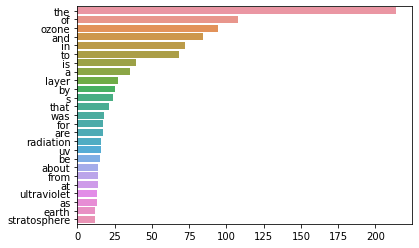

In [36]:
sns.barplot(x = xx[0:25], y = yy[0:25])

In [37]:
# 9) 9 Шаг Filtering фильтрация графика
# Убираем ненужные слова из графика например a, b , c , above

In [38]:
stop_words = ['o', 'm', 'and', 'the', 'a', 'of', 'to', 'in', 'about', 'to', 'is', 'an',
                 'by', 'that', 'for', 'was', 'were', 'are', 'from', 'at', 'it',
                 'as', 'be', 'these', 'on', 'with', 'this', 'have', 'has',
                 'other', 'because', 'can', 'its', 'out', 'into', 'or', 'over',
                 'all', 'most', 'which', 'less', 'while', 'above', 'than', 's', 'b', 'd', 'this','that', 'theese',
                 'what', 'g', 'no', 'end', 'one', 'uv', 'o2', '03', 'h', 'v', 'uv', 'if', 'c', 'so', 'dna', 'du', 'but',
                 'cl', 'br', 'where', 'then', 'may', 'also', 'how', 'much', 'why', 'what', 'used']


In [52]:
meanigful_text = [word for word in plain_text if word not in stop_words]
print(meanigful_text)

['ozone', 'layer', 'ozone', 'shield', 'region', 'earth', 'stratosphere', 'absorbs', 'sun', 'ultraviolet', 'radiation', 'contains', 'high', 'concentration', 'ozone', 'relation', 'parts', 'atmosphere', 'although', 'still', 'small', 'relation', 'gases', 'stratosphere', 'ozone', 'layer', 'contains', 'parts', 'per', 'million', 'ozone', 'average', 'ozone', 'concentration', 'earth', 'atmosphere', 'whole', 'parts', 'per', 'million', 'ozone', 'layer', 'mainly', 'found', 'lower', 'portion', 'stratosphere', 'approximately', 'kilometers', 'earth', 'although', 'thickness', 'varies', 'seasonally', 'geographically', 'ozone', 'layer', 'discovered', 'french', 'physicists', 'charles', 'fabry', 'henri', 'buisson', 'measurements', 'sun', 'showed', 'radiation', 'sent', 'surface', 'reaching', 'ground', 'earth', 'usually', 'consistent', 'spectrum', 'black', 'body', 'temperature', 'range', 'except', 'there', 'radiation', 'below', 'wavelength', 'ultraviolet', 'spectrum', 'deduced', 'missing', 'radiation', 'bei

In [53]:
freq_of_meaningful_words = count_frequency(meanigful_text)
print(freq_of_meaningful_words)

{'ozone': 94, 'layer': 27, 'shield': 3, 'region': 2, 'earth': 12, 'stratosphere': 12, 'absorbs': 4, 'sun': 5, 'ultraviolet': 13, 'radiation': 16, 'contains': 2, 'high': 5, 'concentration': 4, 'relation': 2, 'parts': 5, 'atmosphere': 12, 'although': 4, 'still': 2, 'small': 2, 'gases': 2, 'per': 3, 'million': 4, 'average': 2, 'whole': 1, 'mainly': 2, 'found': 3, 'lower': 2, 'portion': 1, 'approximately': 2, 'kilometers': 2, 'thickness': 3, 'varies': 3, 'seasonally': 1, 'geographically': 1, 'discovered': 2, 'french': 1, 'physicists': 1, 'charles': 1, 'fabry': 1, 'henri': 1, 'buisson': 1, 'measurements': 1, 'showed': 1, 'sent': 1, 'surface': 10, 'reaching': 3, 'ground': 3, 'usually': 1, 'consistent': 1, 'spectrum': 3, 'black': 1, 'body': 1, 'temperature': 1, 'range': 2, 'except': 1, 'there': 3, 'below': 1, 'wavelength': 3, 'deduced': 1, 'missing': 2, 'being': 6, 'absorbed': 1, 'something': 1, 'eventually': 1, 'matched': 1, 'only': 3, 'known': 3, 'chemical': 2, 'properties': 1, 'explored': 

In [54]:
freq_of_meaningful_words = {k:v for k,v in sorted(freq_of_meaningful_words.items(),
                           key=lambda item: item[1], 
                           reverse=True)
                           } # Dictionary comprehention
print(freq_of_meaningful_words)

{'ozone': 94, 'layer': 27, 'radiation': 16, 'ultraviolet': 13, 'earth': 12, 'stratosphere': 12, 'atmosphere': 12, 'depletion': 12, 'surface': 10, 'climate': 10, 'skin': 8, 'united': 8, 'oxygen': 7, 'being': 6, 'stratospheric': 6, 'light': 6, 'air': 6, 'latitudes': 6, 'regulation': 6, 'environmental': 6, 'countries': 6, 'sun': 5, 'high': 5, 'parts': 5, 'between': 5, 'damage': 5, 'cancer': 5, 'nations': 5, 'circulation': 5, 'northern': 5, 'compounds': 5, 'change': 5, 'risks': 5, 'cfcs': 5, 'sciences': 5, 'j': 5, 'absorbs': 4, 'concentration': 4, 'although': 4, 'million': 4, 'dobson': 4, 'percent': 4, 'near': 4, 'atmospheric': 4, 'increased': 4, 'long': 4, 'very': 4, 'important': 4, 'harmful': 4, 'cause': 4, 'effective': 4, 'production': 4, 'spring': 4, 'levels': 4, 'states': 4, 'antarctic': 4, 'ocean': 4, 'since': 4, 'been': 4, 'national': 4, 'case': 4, 'lay': 4, 'metaphors': 4, 'global': 4, 'montreal': 4, 'study': 4, 'andersen': 4, 'k': 4, 'press': 4, 'shield': 3, 'per': 3, 'found': 3, 

<AxesSubplot:>

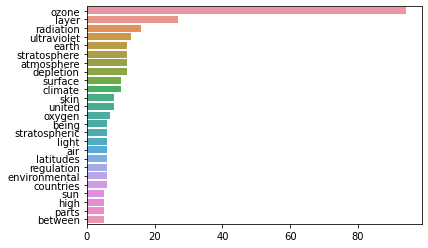

In [42]:
xxx = [v for k,v in freq_of_meaningful_words.items()] # Это номоры черодования 
yyy = [k for k,v in freq_of_meaningful_words.items()] # Это слова из даты 

sns.barplot(x = xxx[0:25], y = yyy[0:25])